#Stock_Market_Sentiment_Base_Analysis

Here we are gonna do sentiment base analysis of stock market for particular stock data.

We are using NLP Model.

First We are creating generalized model without text processing including CounterVectorizer, MultinomialNB and TfidTransformer with Pipeline Architecture. Then, We are creating same model with text processing to get more accuracy.

Data Source: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset



#Start by connecting gdrive into the google colab

In [241]:
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Import Required Libraries

In [242]:
import numpy as np
import pandas as pd

#Load CSV from Google Drive

In [243]:
df = pd.read_csv('/content/gdrive/MyDrive/stock/stock_data.csv',sep=',')

#Visualisation of Dataset

In [244]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


#Replace values of instance "Sentiment" with Bull and Bear

In [245]:
df['Sentiment'].replace({1: 'Bull', -1: 'Bear'}, inplace=True)

In [246]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,Bull
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,Bull
2,user I'd be afraid to short AMZN - they are lo...,Bull
3,MNTA Over 12.00,Bull
4,OI Over 21.37,Bull


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   object
dtypes: object(2)
memory usage: 90.6+ KB


In [248]:
df.describe()

,Text,Sentiment
count,5791,5791
unique,5791,2
top,"DNDN waking up, almost GO TIME here!",Bull
freq,1,3685


#Create New Column 'Text Length' in Dataset

In [249]:
df['text length']=df['Text'].apply(len)

In [250]:
df.head()

,Text,Sentiment,text length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,Bull,95
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,Bull,95
2,user I'd be afraid to short AMZN - they are lo...,Bull,114
3,MNTA Over 12.00,Bull,17
4,OI Over 21.37,Bull,16


#Import Visualisation Libraries

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import plotly.express as px

#Barplot of Sentiment and Text Length

Understand the data by the below given plot, which shows that: For Sentiment Bear Avg. Text Length is Less than Sentiment Bull.

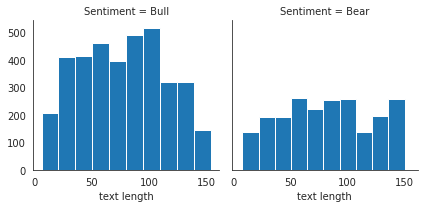

In [252]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'text length')

In [253]:
plt.figure(figsize=(12,12))
px.histogram(x=df['text length'],color=df['Sentiment'],nbins=40)

<Figure size 864x864 with 0 Axes>

#Boxplot for Sentiment and Text Length

Below plot shows that mean value of text length for sentiment bear is higher than bull, which is opposite to bar plot.

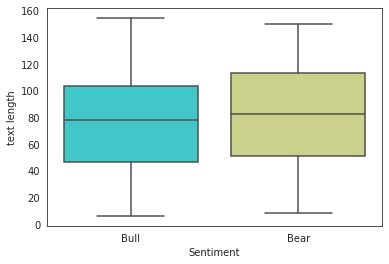

In [254]:
sns.boxplot(x='Sentiment',y='text length',data=df,palette='rainbow')

In [255]:
px.box(x=df['Sentiment'],y=df['text length'])

#Countplot for Sentiment and Text Length

Number of tweet for Bull is more than bear

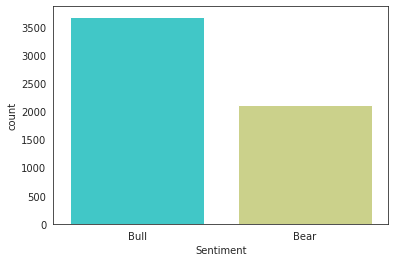

In [256]:
sns.countplot(x='Sentiment',data=df,palette='rainbow')

#Mean of Text Length for both sentiment

In [257]:
stars = df.groupby('Sentiment').mean()
stars

,text length
Sentiment,
Bear,81.505223
Bull,76.794844


#Allocate data of Text and Sentiment to X and y

In [258]:
X = df['Text']
y = df['Sentiment']

#Import CounterVectorizer to transform the data

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

This can be visualized as follows –

https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [259]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [260]:
X = cv.fit_transform(X)

#Split Data In Training And Testing

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

#Fit Data MultinomialNB

This can be visualized as follows –

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

In [263]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [264]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [265]:
predictions = nb.predict(X_test)

#Plot Confusion Matrix and Confusion Matrix for Evaluation

In [266]:
from sklearn.metrics import confusion_matrix,classification_report

In [267]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[339 296]
 [144 959]]


              precision    recall  f1-score   support

        Bear       0.70      0.53      0.61       635
        Bull       0.76      0.87      0.81      1103

    accuracy                           0.75      1738
   macro avg       0.73      0.70      0.71      1738
weighted avg       0.74      0.75      0.74      1738



#Import TfidTransformer

https://medium.com/@hritikattri10/feature-extraction-using-tf-idf-algorithm-44eedb37305e

In [268]:
from sklearn.feature_extraction.text import  TfidfTransformer

#Create Pipeline Model and Repeat Above Process

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

In [269]:
from sklearn.pipeline import Pipeline

In [270]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [271]:
X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [272]:
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

In [273]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 156  479]
 [  28 1075]]
              precision    recall  f1-score   support

        Bear       0.85      0.25      0.38       635
        Bull       0.69      0.97      0.81      1103

    accuracy                           0.71      1738
   macro avg       0.77      0.61      0.60      1738
weighted avg       0.75      0.71      0.65      1738



#Creating NLP Model For Stock Prediction Based On Tweeter Sentiment Analysis (Including Text Processing [Cleaning, Steaming, Contraction Etc.])

In [274]:
import string

mess = 'Hello! I am Sagar : '

In [275]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [276]:
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [277]:
nopunc

'Hello I am Sagar  '

In [278]:
from nltk.corpus import stopwords

In [279]:
import nltk 
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [280]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [281]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [282]:
clean_mess

['Hello', 'Sagar']

In [283]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [284]:
# Check to make sure its working
df['Text'].head(5).apply(text_process)

0    [Kickers, watchlist, XIDE, TIT, SOQ, PNK, CPW,...
1    [user, AAP, MOVIE, 55, return, FEAGEED, indica...
2    [user, Id, afraid, short, AMZN, looking, like,...
3                                         [MNTA, 1200]
4                                           [OI, 2137]
Name: Text, dtype: object

#Import CounterVectorizer to transform the data

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

This can be visualized as follows –

https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [285]:
from sklearn.feature_extraction.text import CountVectorizer

In [286]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])

# Print total number of vocab words in column 'Text'
print(len(bow_transformer.vocabulary_))

13456


In [287]:
tweet5 = df['Text'].iloc[786]
print(tweet5)

AAP  Just broke through a downward triangle coming off a massive head and shoulders.  This thing is toast.


In [288]:
bow4 = bow_transformer.transform([tweet5])
print(bow4)
print(bow4.shape)

  (0, 2007)	1
  (0, 7398)	1
  (0, 7709)	1
  (0, 8243)	1
  (0, 9116)	1
  (0, 10626)	1
  (0, 12172)	1
  (0, 12731)	1
  (0, 12800)	1
  (0, 12899)	1
(1, 13456)


In [289]:
print(bow_transformer.get_feature_names()[13100])

vcomand


In [290]:
tweet_bow = bow_transformer.transform(df['Text'])

In [291]:
print('Shape of Sparse Matrix: ', tweet_bow.shape)
print('Amount of Non-Zero occurences: ', tweet_bow.nnz)

Shape of Sparse Matrix:  (5791, 13456)
Amount of Non-Zero occurences:  53890


In [292]:
#Sparsity and density are terms used to describe the percentage of cells in a database table that are not populated and populated, respectively. The sum of the sparsity and density should equal 100%. 
# sparsity = 100 * number of non-zero occurences / (number of rows * number of columns)
sparsity = (100.0 * tweet_bow.nnz / (tweet_bow.shape[0] * tweet_bow.shape[1]))
print('sparsity: {}'.format(sparsity))
# sparsity = 0.026 which means only 2% of datas are non zero from matrix

sparsity: 0.06915739725692682


In [293]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(tweet_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 12899)	0.3024994102611579
  (0, 12800)	0.3826035186532938
  (0, 12731)	0.30429207937844627
  (0, 12172)	0.3602783022019366
  (0, 10626)	0.3602783022019366
  (0, 9116)	0.3273537461437577
  (0, 8243)	0.3602783022019366
  (0, 7709)	0.2645702198318309
  (0, 7398)	0.2901726041468038
  (0, 2007)	0.13695109742980938


In [294]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['talking']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['warns']])

7.718322785010239
8.565620645397443


In [295]:
tweet_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweet_tfidf.shape)

(5791, 13456)


In [296]:
from sklearn.naive_bayes import MultinomialNB
stock_prediction_model = MultinomialNB().fit(tweet_tfidf, df['Sentiment'])

In [297]:
print('predicted:', stock_prediction_model.predict(tfidf4))
print('expected:', df.Sentiment.iloc[9])

predicted: ['Bear']
expected: Bull


In [298]:
all_predictions = corona_detect_model.predict(tweet_tfidf)
print(all_predictions)

['Bull' 'Bull' 'Bull' ... 'Bull' 'Bull' 'Bull']


In [299]:
from sklearn.metrics import classification_report
print (classification_report(df['Sentiment'], all_predictions))

              precision    recall  f1-score   support

        Bear       0.98      0.62      0.76      2106
        Bull       0.82      0.99      0.90      3685

    accuracy                           0.86      5791
   macro avg       0.90      0.81      0.83      5791
weighted avg       0.88      0.86      0.85      5791



In [300]:
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, sentiment_train, sentiment_test = \
train_test_split(df['Text'], df['Sentiment'], test_size=0.2)

print(len(tweet_train), len(tweet_test), len(tweet_train) + len(tweet_test))

4632 1159 5791


In [301]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [302]:
pipeline.fit(tweet_train,sentiment_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f685f451710>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [303]:
predictions = pipeline.predict(tweet_test)

In [304]:
print(classification_report(predictions,sentiment_test))

              precision    recall  f1-score   support

        Bear       0.29      0.82      0.42       142
        Bull       0.97      0.71      0.82      1017

    accuracy                           0.73      1159
   macro avg       0.63      0.77      0.62      1159
weighted avg       0.88      0.73      0.77      1159



#Deployment Model For Twitter Sentiment Base Stock Prediction

In [305]:
#generate random number between 0 to 1159 (which is total number of data).
import random

i = random.randint(0,1159)
print('random digit:',i)
print("------------------------------------------------------------------------")

#take random number of tweet (text) for predicting the sentiment behind it
rand = tweet_test.iloc[i]

#preprocess the tweet and put in our created model to predict sentiment 
bow4 = bow_transformer.transform([rand])
print(bow4)
print(bow4.shape)
print("------------------------------------------------------------------------")
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

#result of prediction
print("------------------------------------------------------------------------")
print('Predicted:', corona_detect_model.predict(tfidf4)[0])



#Prediction for pipeline base model
print("------------------------------------------------------------------------")
ml = pd.DataFrame(tweet_test.head(1))

ml['Text']=ml['Text'].replace(ml['Text'].iloc[0], rand)
print("Predicted by Pipeline Model: ",pipeline.predict(ml)[0])

#check the actual value of sentiment for that predicted tweet
print("------------------------------------------------------------------------")
print('Actual value:',predictions[i])



random digit: 154
------------------------------------------------------------------------
  (0, 2110)	1
(1, 13456)
------------------------------------------------------------------------
  (0, 2110)	1.0
------------------------------------------------------------------------
Predicted: Bull
------------------------------------------------------------------------
Predicted by Pipeline Model:  Bull
------------------------------------------------------------------------
Actual value: Bull
